## Sunspot task

The Sunspot task consists in a next-step prediction (autoregressive, a particular case of transduction) on a [time-series](https://drive.google.com/file/d/1GK5fqzuAGoo466PIxhnwxtSP0r3uDFWa/view?usp=sharing) consisting in monthly averaged solar sunspots.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import train_test_split

from liquid_state_machine import LSM

In [2]:
dset = pd.read_csv('./solar_data.csv', header=None).to_numpy().squeeze()
dset

array([ 58. ,  62.6,  70. , ..., 132. , 105.2, 147. ])

In [3]:
dset.shape

(2899,)

In [4]:
#input_dset, target_dset = dset[:,:-1], dset[:,1:]
x_train, x_test = dset[:2398], dset[2399:]
tsize = int(len(x_train)*0.75)
x_val= x_train[tsize:]
y_train, y_val, y_test=x_train[1:], x_val[1:], x_test[1:]
x_train, x_val, x_test = x_train[:-1], x_val[:-1], x_test[:-1]

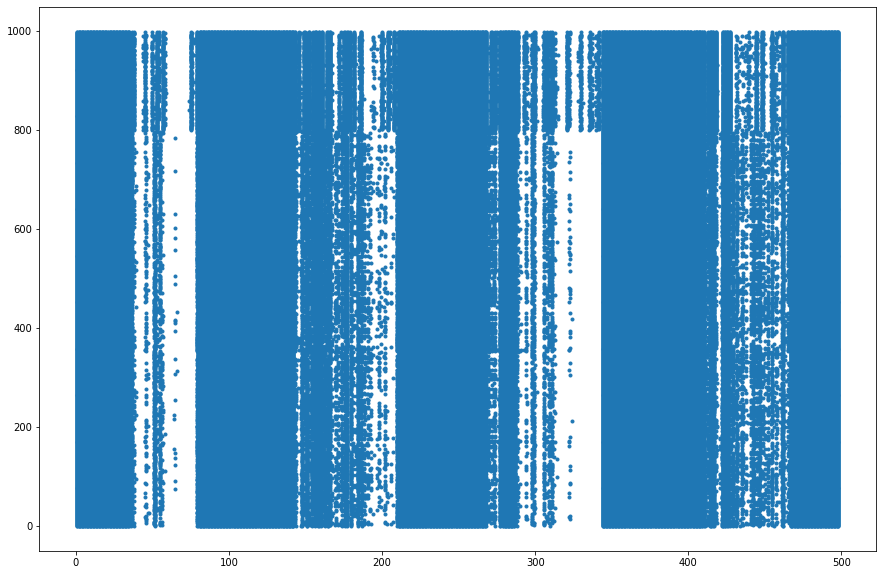

In [5]:
lsm = LSM()

plt.figure(figsize=[15,10])
input_data = x_test
states, firings = lsm.simulation(input_data)

#### Grid search